In [ ]:
!pip install albumentations

In [18]:
import random
import cv2
import numpy as np
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil

In [29]:
# Function to augment an image and return an augmented PIL image
def augment_img(img):

    img = np.asarray(img)  # Convert to numpy for OpenCV

    if len(img.shape) == 2:  # If the image is grayscale (2D array)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    if img.shape[2] == 4:  # If the image has an alpha channel (4 channels)
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)  # Convert to RGB

    # Morphological alterations
    kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
    if random.randint(1, 5) == 1:
        img = cv2.erode(img, kernel_erode, iterations=random.randint(1, 2))
    if random.randint(1, 10) == 1:
        img = cv2.dilate(img, kernel_dilate, iterations=1)

   # Simplified augmentation transformations with no repetition
    transform = A.Compose([
        A.OneOf([
            # Lowered brightness coefficient, drop length, and probability for less intense noise
            A.RandomRain(brightness_coefficient=0.90, drop_length=1, drop_width=1, drop_color=(0, 0, 0), blur_value=1, rain_type='drizzle', p=0.05),
            A.RandomShadow(p=0.2),  # Lowered probability for shadows
            A.PixelDropout(dropout_prob=0.05, drop_value=0, p=0.2),  # Reduced dropout probability and intensity
            A.PixelDropout(dropout_prob=0.05, drop_value=255, p=0.2),  # Reduced dropout probability for white pixels
            A.RandomRain(brightness_coefficient=0.85, drop_length=1, drop_width=1, drop_color=(255, 255, 255), blur_value=1, rain_type=None, p=0.2),
        ], p=0.8),  # Reduced overall probability for noise effects

        A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.03, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.4),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=1, border_mode=cv2.BORDER_CONSTANT, value=(255, 255, 255), p=0.4),
            A.Affine(shear=random.randint(-1, 1), mode=cv2.BORDER_CONSTANT, cval=(255, 255, 255), p=0.3),
        ], p=0.4),  # Lowered the probability for geometric transformations

        A.Blur(blur_limit=1, p=0.2),  # Corrected blur limit for light blurring
    ])


    # Apply augmentation
    img = transform(image=img)['image']

    #convert back to grayscale
    img =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    image = Image.fromarray(img)  # Convert back to PIL image
    return image


In [21]:
# Function to generate augmented versions of an image
def generate_augmented_images(img, num_augments):
    augmented_images = []
    for _ in range(num_augments):
        augmented_images.append(augment_img(img))
    return augmented_images

In [22]:
# Function to display original and augmented images side by side
def display_images_side_by_side(original_img, augmented_images):
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, len(augmented_images) + 1, 1)
    plt.imshow(original_img)
    plt.title("Original")
    plt.axis('off')

    # Display each augmented image
    for i, aug_img in enumerate(augmented_images):
        plt.subplot(1, len(augmented_images) + 1, i + 2)
        plt.imshow(aug_img,cmap='gray')
        plt.title(f"Augmented {i+1}")
        plt.axis('off')

    plt.show()

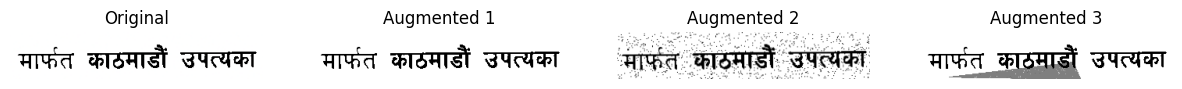

In [47]:
image_path = '/content/8.png'  # Replace with your image path
original_img = Image.open(image_path)  # Load the original image

# Generate 3 augmentations for the original image
augmented_images = generate_augmented_images(original_img, num_augments=3)
# augmented_grayscale_images = convert_back_to_grayscale(augmented_images)

# Display the original image and the augmented versions side by side
display_images_side_by_side(original_img, augmented_images)

In [ ]:
counter =1
for img in augmented_images:
  name=f'/content/aug-{counter}.jpg'
  img.save(name)
  counter+=1

In [ ]:
augmented_images


[<PIL.Image.Image image mode=L size=324x60>,
 <PIL.Image.Image image mode=L size=324x60>,
 <PIL.Image.Image image mode=L size=324x60>]

In [49]:
# Generate augmentations for each folder
# Loop through each file in the folder

input_folder='/content/drive/MyDrive/ground-truth-organic'
output_folder='/content/drive/MyDrive/augment-3-data/'

for filename in os.listdir(input_folder):

    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):

      file_path = os.path.join(input_folder,filename)
      image_id,ext = file_root, file_ext = os.path.splitext(filename)
      # Now handle the ground truth file (gt.txt)

      gt_file_name = f"{image_id}.gt.txt"  # Expected ground truth file name
      gt_file_path = os.path.join(input_folder, gt_file_name)

      with Image.open(file_path) as img:

        # Generate 2 augmentations for the original image
        augmented_images = generate_augmented_images(img, num_augments=3)
        counter=1

        for aug in augmented_images:

          #save augmented images with new name: example-> 1(aug_1).png, 1(aug_2).png
          full_path=output_folder +f"{image_id}(aug_{counter})"
          aug.save(full_path+'.png')

          #now duplicate gt file for both augmentations
          aug_gt_path=full_path+'.gt.txt'
          shutil.copy(gt_file_path,aug_gt_path)

          counter+=1

print("Augmenations generated successfully")


Augmenations generated successfully
